# Homework 6


This homework is designed to process a large csv file (bigger than pandas can handle)
https://github.com/msaricaumbc/DS_data/blob/master/bigfile.csv.zip?raw=true

Write code to perform/answer the following actions:

1. Print how many records processed
1. Create a histogram of ages
1. List the top 20 occupations 

Don't use Pandas or Dask

In [ ]:
!head

<h5>Imports</h5>

In [1]:
from urllib import request
from zipfile import ZipFile
import chardet
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Function to download large zip file
def download_file(file_name, url):
    res = request.urlopen(url)
    with open(file_name,'wb') as file:
        file.write(res.read())

In [3]:
download_file('largefile.zip', 'https://github.com/msaricaumbc/DS_data/blob/master/bigfile.csv.zip?raw=true')

In [4]:
# Listing files to check if the file is downloaded
!ls

PoliceShootingsUS.csv
PoliceShootingsUS.zip
__MACOSX
hw-06.ipynb
largefile.zip
volunteers.txt
week06_lab.ipynb


<h5>Unzipping File</h5>

In [5]:
# Function to unzip a zip file using Zipfile module
def unzip(file_name, path='./'):
    # opening the zip file in READ mode 
    with ZipFile(file_name, 'r') as zip: 
        # printing all the contents of the zip file 
        zip.printdir() 
        # extracting all the files 
        print('Extracting all the files now...') 
        zip.extractall(path = path) 
        print('Done!')

In [6]:
# calling unzip function to unzip downloaded zip
unzip('largefile.zip')

File Name                                             Modified             Size
bigfile.csv                                    2022-03-07 20:08:48  18034182194
Extracting all the files now...
Done!


In [7]:
# list file in the current directory to check unzipped files
!ls

PoliceShootingsUS.csv
PoliceShootingsUS.zip
__MACOSX
bigfile.csv
hw-06.ipynb
largefile.zip
volunteers.txt
week06_lab.ipynb


<h5>Print how many records processed</h5>

In [11]:
start = time.time()
extracted_data=[]
with open('bigfile.csv', 'r') as file:
    while(True):
        data = file.readline()
        if not data:
            break
        tempList=data.split(",")[0:6]
        extracted_data.append(tempList)
print(r"records processed=", len(extracted_data))
print(r"time taken=", time.time()-start)

records processed= 600000
time taken= 32.01787066459656


In [13]:
df=pd.DataFrame(extracted_data, columns=["FirstName", "LastName", "YearOfBirth", "Age", "Occupation", "PhoneNumber"])

In [14]:
df.info()
df.describe()
df['Age'] = pd.to_numeric(df['Age'])
df['YearOfBirth'] = pd.to_datetime(df.YearOfBirth).dt.year

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   FirstName    600000 non-null  object
 1   LastName     600000 non-null  object
 2   YearOfBirth  600000 non-null  object
 3   Age          600000 non-null  object
 4   Occupation   600000 non-null  object
 5   PhoneNumber  600000 non-null  object
dtypes: object(6)
memory usage: 27.5+ MB


<h5>Create a histogram of ages</h5>

Text(0.5, 1.0, 'histogram of age')

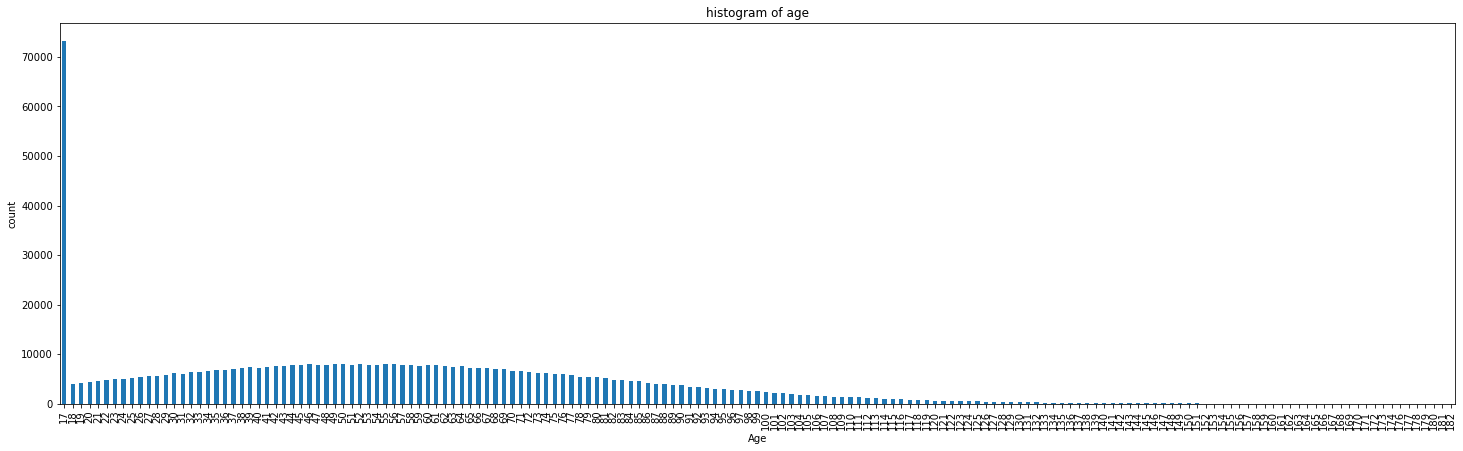

In [22]:
df.groupby('Age').Age.count().plot.bar(figsize=(25, 7))
plt.ylabel("count")
plt.title("histogram of age")

Text(0.5, 1.0, 'Histogram of ages')

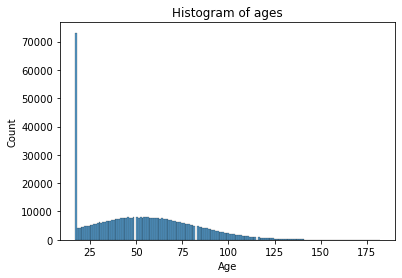

In [19]:
plot=sns.histplot(data=df, x="Age")
plot.set_title('Histogram of ages')

Text(0.5, 1.0, 'Histogram')

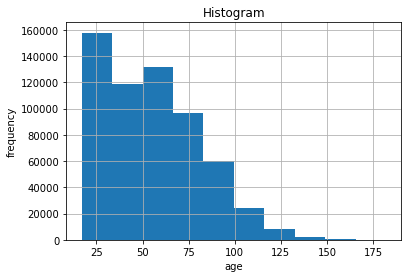

In [20]:
df.hist(column='Age')
plt.ylabel('frequency')
plt.xlabel('age')
plt.title('Histogram')

<h5>List the top 20 occupations</h5>

In [21]:
df.groupby('Occupation').Occupation.count().sort_values(ascending=False).head(20)

Occupation
Scientist- product/process development              1064
Psychiatric nurse                                   1037
Therapist- sports                                   1030
Toxicologist                                        1024
Social researcher                                   1021
Environmental health practitioner                   1020
Naval architect                                     1019
Teacher- primary school                             1018
Administrator- charities/voluntary organisations    1018
Chartered loss adjuster                             1012
Field trials officer                                1008
Photographer                                        1008
Radio producer                                      1006
Ranger/warden                                       1004
Electrical engineer                                 1004
Radiographer- diagnostic                            1004
Administrator- education                            1003
Acupuncturist       